# Начало

1. Импортируем библиотеки, которые будем использовать; 
2. В переменную dataset прогрузим наши данные.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
dataset = 'https://raw.githubusercontent.com/alaevmt/project_abalone/main/abalone.csv'

In [71]:
df = pd.read_csv(dataset)

# Описание данных

В тёплых тропических и субтропических водах на побережье Калифорнии в США, а также на побережье Мексики можно встретить невзрачного на вид моллюска под названием галиотис или по простому - морское ушко. Эта брюхоногая улитка и правда напоминает человеческое ухо, вырастая как правило до 5-7 см в длину, изредка встречаются и особи побольше - до 35 см. Очень редко, в одном случае из 50-ти тысяч, в раковине моллюска галиотис находят причудливые жемчужины, получившие название Абалон.

## Abalone
**Predict the age of abalone from physical measurements**

`Sex` - nominal -  M, F, and I (infant)

`Length` - continuous - mm -  Longest shell measurement

`Diameter` -  continuous - mm - perpendicular to length

`Height` - continuous - mm - with meat in shell

`Whole weight` - continuous - grams - whole abalone

`Shucked weight` - continuous - grams - weight of meat

`Viscera weight` - continuous - grams - gut weight (after bleeding)

`Shell weight` - continuous - grams - after being dried 

`Rings` - integer -  +1.5 gives the age in years (target)

Итак, целевым атрибутом в наших данных является `Rings`. Он указывает на прогнозируемый возраст морского ушка.

# Анализ данных

In [72]:
df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [73]:
print(f'Размер датасета составляет {df.shape[0]} строк, {df.shape[1]} столбцов.')

Размер датасета составляет 4177 строк, 9 столбцов.


Проверим типы каждого атрибута в данных.

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4078 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4078 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4127 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


В `Diameter`, `Shell weight ` и `Whole weight` есть пропущенные значения.

Выведим медиану по столбцу `Diameter`

In [75]:
median_diameter = df[~df['Diameter'].isnull()]['Diameter'].median()
median_diameter

0.425

Заменим пустые значения `Diameter` медианой

In [76]:
df['Diameter'].fillna(median_diameter, inplace=True)

Остальные сделаем по аналогии

In [77]:
median_Whole_weight = df[~df['Whole weight'].isnull()]['Whole weight'].median()
median_Whole_weight

0.7985

In [78]:
df['Whole weight'].fillna(median_Whole_weight, inplace=True)

In [79]:
median_Shell_weight = df[~df['Shell weight'].isnull()]['Shell weight'].median()
df['Shell weight'].fillna(median_Shell_weight, inplace=True)

Проверим, что пропущенных значений не осталось

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Проверим на дубли

In [13]:
df[df.duplicated()]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


Посмотрим гистрограммы

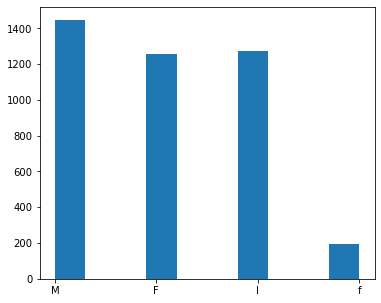

In [49]:
plt.figure(figsize=(6,5))

plt.hist(df.Sex);

Мы знаем, что в `Sex` должно быть 3 номинала. По всей видимости "f" необходимо поменять на "F", чтобы было корректно. Сделаем это.

In [81]:
df.loc[df['Sex'] == 'f', 'Sex'] = 'F'

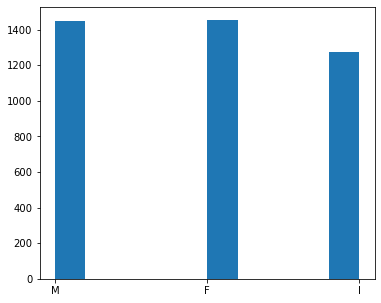

In [55]:
plt.figure(figsize=(6,5))

plt.hist(df.Sex);

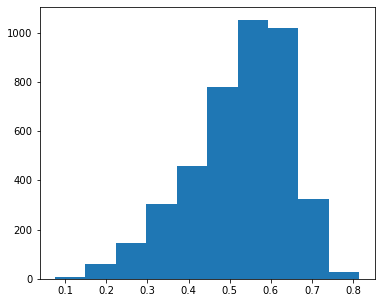

In [56]:
plt.figure(figsize=(6,5))

plt.hist(df.Length);

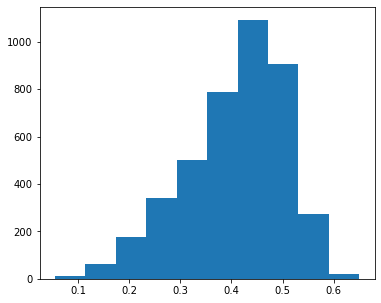

In [57]:
plt.figure(figsize=(6,5))

plt.hist(df.Diameter);

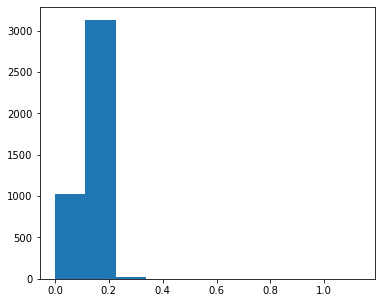

In [58]:
plt.figure(figsize=(6,5))

plt.hist(df.Height);

По высоте модой является значение около 0.2. Таких значений порядка 3 тыс.

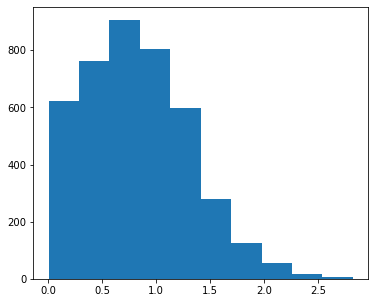

In [59]:
plt.figure(figsize=(6,5))

plt.hist(df['Whole weight']);

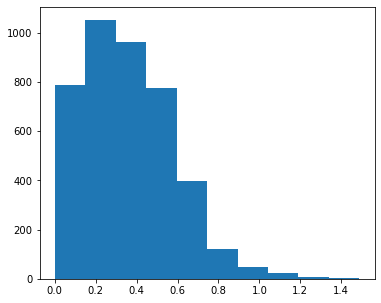

In [60]:
plt.figure(figsize=(6,5))

plt.hist(df['Shucked weight']);

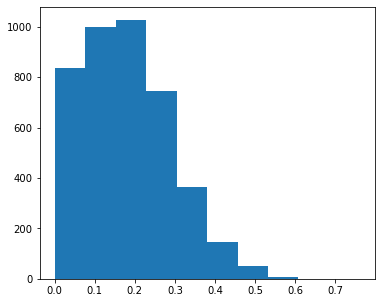

In [61]:
plt.figure(figsize=(6,5))

plt.hist(df['Viscera weight']);

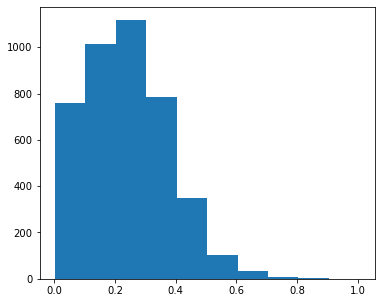

In [62]:
plt.figure(figsize=(6,5))

plt.hist(df['Shell weight']);

Можно отметить, что чем больше атрибут, который связан с weight, тем меньше вероятность встретить морское ушко в нашей выборке.

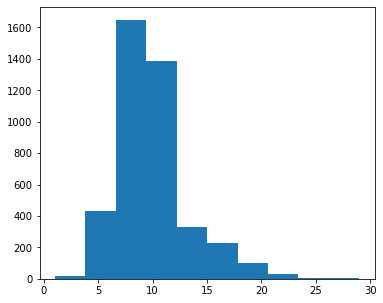

In [63]:
plt.figure(figsize=(6,5))

plt.hist(df['Rings']);

Прочитав описание датасета более подробно, пришел к выводу, что атрибут `Rings` необходим для подсчета возраста морского ушка. Возраст равен значению `Rings` + 1.5. Попробуем вывести возраст морского ушка. 

In [82]:
df['Age'] = df['Rings'] + 1.5
df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.7985,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


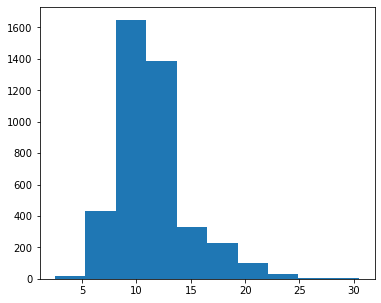

In [66]:
plt.figure(figsize=(6,5))

plt.hist(df['Age']);

Модой возвраста судя по графику является возвраст 10 лет. Встречается порядка 1600 раз.

Считаю, что атрибут `Rings` можно удалить.

In [83]:
df = df.drop('Rings', axis=1)
df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.7985,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


Теперь будем считать, что целевой атрибут будет `Age`

In [84]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.408246,0.139516,0.826623,0.359367,0.180594,0.239023,11.433684
std,0.120093,0.098137,0.041827,0.484521,0.221963,0.109614,0.138108,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.447500,0.186000,0.093500,0.131500,9.500000
50%,0.545000,0.425000,0.140000,0.798500,0.336000,0.171000,0.235000,10.500000
75%,0.615000,0.480000,0.165000,1.141500,0.502000,0.253000,0.325000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [85]:
df.describe(include='object')

,Sex
count,4177
unique,3
top,F
freq,1454


Посмотрим на распределение `Age`

<AxesSubplot:xlabel='Age', ylabel='Count'>

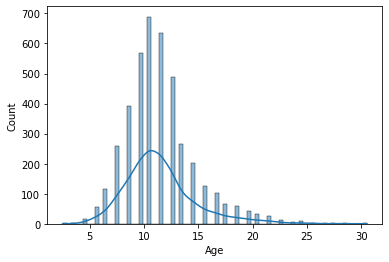

In [86]:
sns.histplot(data = df['Age'], kde = True)

Судя по распределнию (если я правильно понимаю - нормальное распред), у нас есть хвосты, которые значительно отличаются от большинства значений. Предполагаю, это может мешать при обучении модели.

# Взаимозависимость в данных

Посмотрим на корреляцию данных в нашем датасете.

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Length,1.000000,0.974693,0.827554,0.915426,0.897914,0.903018,0.889517,0.556720
Diameter,0.974693,1.000000,0.823014,0.906350,0.882375,0.888190,0.885752,0.563512
Height,0.827554,0.823014,1.000000,0.811451,0.774972,0.798319,0.809684,0.557467
Whole weight,0.915426,0.906350,0.811451,1.000000,0.957427,0.954036,0.934197,0.532149
Shucked weight,0.897914,0.882375,0.774972,0.957427,1.000000,0.931961,0.874333,0.420884
Viscera weight,0.903018,0.888190,0.798319,0.954036,0.931961,1.000000,0.899098,0.503819
Shell weight,0.889517,0.885752,0.809684,0.934197,0.874333,0.899098,1.000000,0.622194
Age,0.556720,0.563512,0.557467,0.532149,0.420884,0.503819,0.622194,1.000000


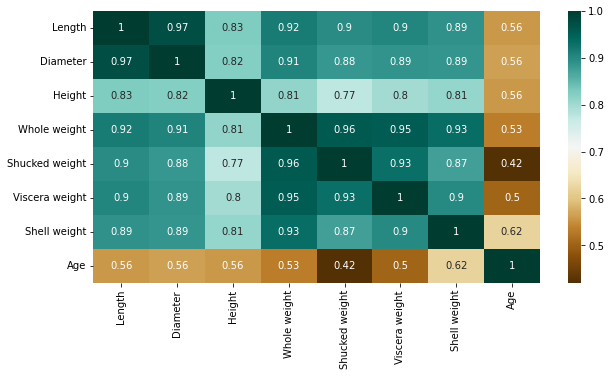

In [87]:
plt.figure(figsize=(10, 5))
corr = df.corr()
sns.heatmap(corr, cmap='BrBG', annot=True)
corr

Мы видим, что почти всё между собой сильно коррелирует, кроме нашей цели.

Посмотрим, есть ли связь между `sex` и `age`. Возьмем метод ANOVA.

In [89]:
from scipy.stats import f_oneway

In [90]:
CategoryGroupLists = df.groupby('Sex')['Age'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  2.35303895865748e-182


In [92]:
if AnovaResults[1] >= 0.05:
    print('Features are NOT correlated')
else:
    print('Features are correlated')

Features are correlated


Можно сделать вывод, что есть связь между гендером и возврастом морского ушка.

# Сравнение Pandas с Polars

Увеличим наш датасет до 1_000_000 строк.

In [95]:
df_big = df.copy()

In [98]:
for i in range(250):
    df_big = pd.concat([df_big, df])

df_big.shape

(1048427, 9)

In [99]:
!pip install polars

In [100]:
import polars as pl

In [101]:
df_big.to_csv('abalone_big_df.csv', index=False)

Сравним время загрузки данных с помощью двух библиотек.

In [103]:
%%time
df_pl = pl.read_csv('abalone_big_df.csv')

CPU times: total: 922 ms
Wall time: 123 ms


In [105]:
%%time
df_pd = pd.read_csv('abalone_big_df.csv')

CPU times: total: 688 ms
Wall time: 690 ms


Загрузка данных у Polars быстрее.

In [118]:
%%time
df_pl.filter(pl.col('Age') < 10.5)

CPU times: total: 31.2 ms
Wall time: 24.4 ms


Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
str,f64,f64,f64,f64,f64,f64,f64,f64
"""M""",0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,8.5
"""I""",0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,8.5
"""I""",0.425,0.3,0.095,0.3515,0.141,0.0775,0.12,9.5
"""I""",0.355,0.28,0.085,0.2905,0.095,0.0395,0.115,8.5
"""M""",0.365,0.295,0.08,0.2555,0.097,0.043,0.1,8.5
"""M""",0.465,0.355,0.105,0.4795,0.227,0.124,0.125,9.5
"""F""",0.45,0.355,0.105,0.5225,0.237,0.1165,0.145,9.5
"""I""",0.24,0.175,0.045,0.07,0.0315,0.0235,0.02,6.5
"""I""",0.205,0.15,0.055,0.7985,0.0255,0.015,0.012,6.5


In [120]:
%%time
df_pd[df_pd['Age'] < 10.5]

CPU times: total: 15.6 ms
Wall time: 19.6 ms


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,9.5
16,I,0.355,0.280,0.085,0.2905,0.0950,0.0395,0.1150,8.5
18,M,0.365,0.295,0.080,0.2555,0.0970,0.0430,0.1000,8.5
...,...,...,...,...,...,...,...,...,...
1048413,I,0.390,0.425,0.085,0.3440,0.1810,0.0695,0.0790,8.5
1048414,I,0.390,0.290,0.100,0.2845,0.1255,0.0635,0.2350,8.5
1048415,I,0.405,0.300,0.085,0.3035,0.1500,0.0505,0.0880,8.5
1048418,F,0.515,0.400,0.125,0.6150,0.2865,0.1230,0.1765,9.5


Фильтрация кажется быстрее у Pandas

In [150]:
%%time
df_pl.group_by('Sex').agg(pl.mean('Age'))

CPU times: total: 109 ms
Wall time: 35.8 ms


Sex,Age
str,f64
"""F""",12.501376
"""M""",12.178645
"""I""",9.372257


In [143]:
%%time
df_pd.groupby('Sex').agg({'Age': 'mean'})

CPU times: total: 78.1 ms
Wall time: 52.5 ms


,Age
Sex,
F,12.501376
I,9.372257
M,12.178645


Polars как-будто быстрее агрегирует данные, но с каждым выполнением время разное. Несколько раз Pandas был быстрее.